In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='liac-arff')
X_org = X.copy()
y_org = y.copy()

In [6]:
from PIL import Image
from numpy import asarray
from time import sleep

def open_and_plot(s, do_normalize):
    image_org = Image.open('digit.png')
    image = 255 - asarray(image_org).flatten()
    if do_normalize: 
        image = normalize([image])
    #image = ss.transform([image])
    index = s.predict(image)
    plt.imshow(image.reshape(28,28), cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.title(index)
    plt.show()

In [7]:
import pickle

def load_model(fn):
    with open(fn, "rb") as f:
        return pickle.load(f)

def save_model(s, fn):
    with open(fn, "wb") as f:
        pickle.dump(s, f)

In [28]:
def print_metrics(s, s_test_predict, y):
    print("accuracy", metrics.accuracy_score(s_test_predict, y))
    metrics.ConfusionMatrixDisplay.from_predictions(y, s_test_predict)
    plt.show()

In [9]:
import inotify.adapters

def inotify_watch(s, do_normalize):
    i = inotify.adapters.Inotify()
    i.add_watch('digit.png')
    
    for event in i.event_gen(yield_nones=False):
        print(event)
        if event[0].mask == 2:
            sleep(0.5)
            open_and_plot(s, do_normalize)

# Data preparation

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [11]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.svm import SVC

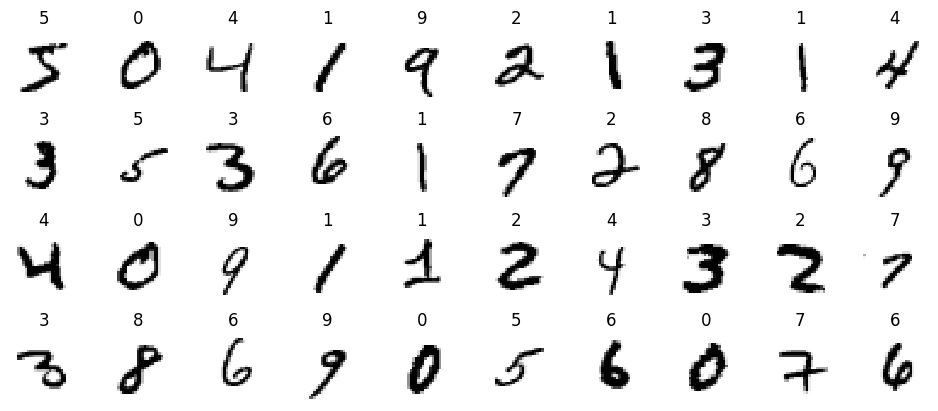

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X.iloc[index].to_numpy().reshape(28,28), cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Without normalization

In [16]:
X, y = X_org, y_org
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [17]:
s = SVC(C=2, degree=9)
s.fit(X_train, y_train)

SVC(C=2, degree=9)

In [24]:
s_test_predict = s.predict(X_test)

accuracy 0.9838571428571429


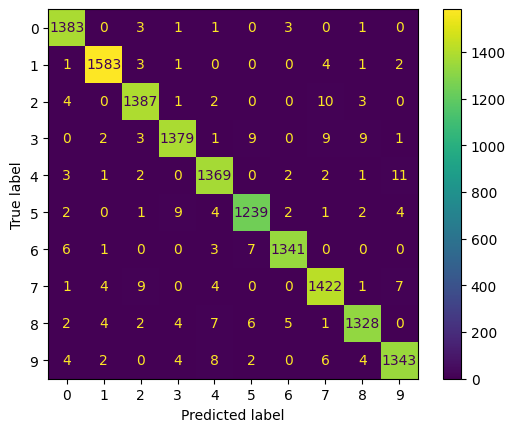

In [29]:
print_metrics(s, s_test_predict, y_test)

# With normalization

In [31]:
X = normalize(X_org)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

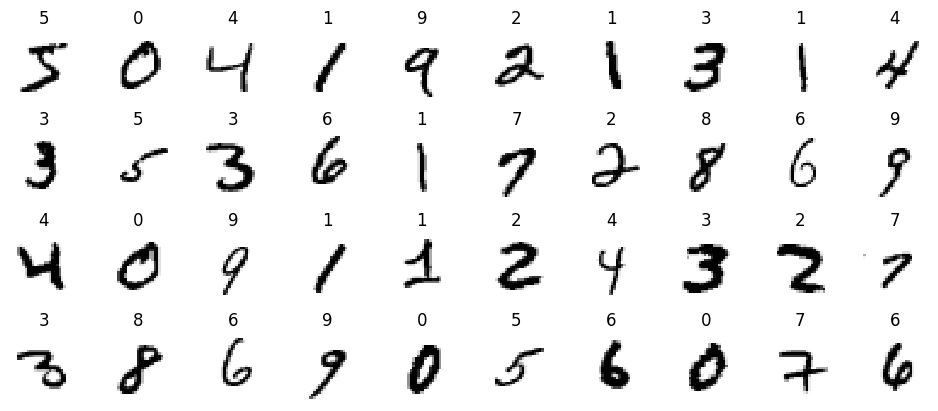

In [37]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X[index].reshape(28,28), cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [38]:
sn = SVC(C=2, degree=9)
sn.fit(X_train, y_train)

SVC(C=2, degree=9)

In [41]:
sn_test_predict = sn.predict(X_test)

accuracy 0.9828571428571429


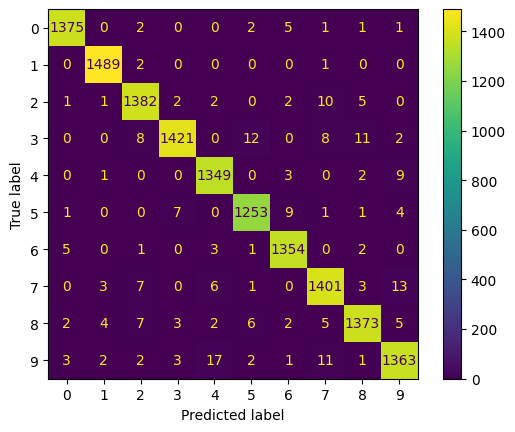

In [42]:
print_metrics(sn, sn_test_predict, y_test)